In [4]:
import importlib
import VanillaChord as vc
importlib.reload(vc)

def print_fingers(node, m=8):
    print(f'Finger table of {node.ID}')
    print('start | interval | finger')
    for i in range(m):
        print(str(node.FingerTable['start'][i]) + ' | ' + str(node.FingerTable['interval'][i]) + ' | ' + str(node.FingerTable['finger'][i].ID))
    return

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_Chord(pts, m, title_str='Current Chord graph'):
    '''
    pts: list (int)
        List of Node IDs
    m: int
        Length of key representation in bits
    title_str:
        Title for plot
    '''
    MAX = 2**m
    pts.append(MAX)
    pts = np.array(pts)
    angles = -2*np.pi*((pts%MAX)/MAX) + np.pi/2

    xs, ys = np.cos(angles), np.sin(angles)

    fig, ax = plt.subplots()
    ax.set_xlim((-1.5, 1.5))
    ax.set_ylim((-1.5, 1.5))
    circle = patches.Circle((0, 0), radius=1, fill=False)
    ax.add_patch(circle)
    plt.scatter(xs[:-1], ys[:-1], c='b')
    plt.scatter(xs[-1], ys[-1], c='r')
    for i, txt in enumerate(pts):
        ax.annotate(txt, (xs[i], ys[i]))
    plt.xticks([])
    plt.yticks([])
    plt.title(title_str)
    plt.show()

# Validation Example

Using the example of https://medium.com/@jingyang_56841/key-lookup-in-chord-with-finger-table-c0179bafae13 for validation.

Join of node 2:
Finger table of 45
start | interval | finger
46 | (46, 47) | 132
47 | (47, 49) | 132
49 | (49, 53) | 132
53 | (53, 61) | 132
61 | (61, 77) | 132
77 | (77, 109) | 132
109 | (109, 173) | 132
173 | (173, 45) | 45
Finger table of 132
start | interval | finger
133 | (133, 134) | 45
134 | (134, 136) | 45
136 | (136, 140) | 45
140 | (140, 148) | 45
148 | (148, 164) | 45
164 | (164, 196) | 45
196 | (196, 4) | 45
4 | (4, 132) | 45
Join of node 3:
Finger table of 45
start | interval | finger
46 | (46, 47) | 99
47 | (47, 49) | 99
49 | (49, 53) | 99
53 | (53, 61) | 99
61 | (61, 77) | 99
77 | (77, 109) | 99
109 | (109, 173) | 132
173 | (173, 45) | 45
Finger table of 99
start | interval | finger
100 | (100, 101) | 132
101 | (101, 103) | 132
103 | (103, 107) | 132
107 | (107, 115) | 132
115 | (115, 131) | 132
131 | (131, 163) | 132
163 | (163, 227) | 45
227 | (227, 99) | 45
Join of node 4:
Finger table of 45
start | interval | finger
46 | (46, 47) | 99
47 | (47, 49) | 99
49 | (49, 53)

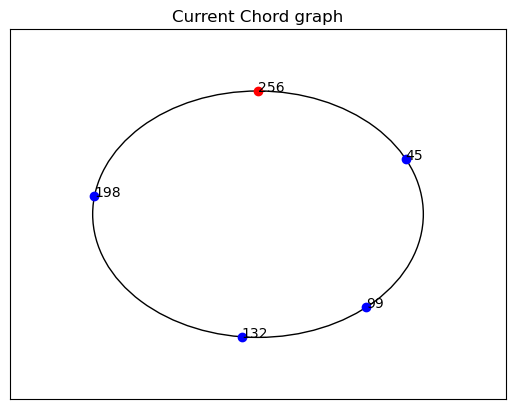

In [6]:
# Initializing nodes
v1 = vc.Chord_Node(45, 8)
v2 = vc.Chord_Node(132, 8)
v3 = vc.Chord_Node(99, 8)
v4 = vc.Chord_Node(198, 8)

v1.join(v1)
v2.join(v1)
print('Join of node 2:')
print_fingers(v1)
print_fingers(v2)
v3.join(v1)
print('Join of node 3:')
print_fingers(v1)
print_fingers(v3)
v4.join(v1)
print('Join of node 4:')
print_fingers(v1)
print_fingers(v4)

nodes = [45, 99, 132, 198]
plot_Chord(nodes, 8)

# TODO: Test stabilization